In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
100,15766289,Male,27,88000,0
251,15723373,Male,37,52000,0
235,15646227,Male,46,79000,1
230,15794253,Female,35,147000,1
295,15725794,Female,36,63000,0


In [4]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
df=df.iloc[:,2:]

In [6]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [7]:
x=df.iloc[:,0:2]
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [8]:
y=df.iloc[:,2:]
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


**Train Test Split**

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [10]:
X_train.shape,y_train.shape

((280, 2), (280, 1))

In [11]:
X_test.shape,y_test.shape

((120, 2), (120, 1))

**StandardScaler**

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#fit the scaler into train set it will learn the parameters
scaler.fit(X_train)
#scale and transform train and test data
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
X_train_scaled

array([[-1.0360345 ,  0.72613711],
       [ 0.14359136, -0.85701979],
       [ 0.83170645, -0.88633751],
       [ 1.22491506, -1.03292611],
       [-0.64282588, -0.09475906],
       [-1.13433665,  0.25705358],
       [ 2.20793661, -0.85701979],
       [ 0.63510214, -0.94497295],
       [-1.13433665,  0.02251182],
       [ 0.24189352, -0.2999831 ],
       [-0.93773234, -1.00360839],
       [ 0.24189352,  0.19841814],
       [-0.05301295,  0.25705358],
       [-0.34791941,  0.02251182],
       [ 1.12661291,  0.52091307],
       [ 0.9300086 , -1.09156155],
       [-0.05301295,  0.08114726],
       [ 0.83170645,  1.34180923],
       [ 1.02831075,  1.95748136],
       [-0.44622157, -0.82770207],
       [-1.52754527,  0.2863713 ],
       [-0.1513151 , -0.62247803],
       [ 0.9300086 , -0.62247803],
       [ 0.9300086 , -0.71043119],
       [-1.0360345 , -0.38793626],
       [-0.24961726, -0.94497295],
       [ 2.0113323 , -0.71043119],
       [ 0.04528921,  1.19522063],
       [-1.62584742,

In [14]:
scaler.mean_

array([3.75392857e+01, 7.12321429e+04])

In [15]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [16]:
X_train_scaled

,Age,EstimatedSalary
0,-1.036034,0.726137
1,0.143591,-0.857020
2,0.831706,-0.886338
3,1.224915,-1.032926
4,-0.642826,-0.094759
...,...,...
275,-1.036034,-0.387936
276,-0.053013,2.192023
277,0.930009,2.133388
278,0.831706,-1.443374


In [17]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,-0.0
75%,0.7,0.5
max,2.2,2.3


In [18]:
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.539286,71232.142857
std,10.190931,34170.136761
min,18.000000,15000.000000
25%,30.000000,45500.000000
50%,37.000000,71000.000000
75%,45.000000,89000.000000
max,60.000000,149000.000000


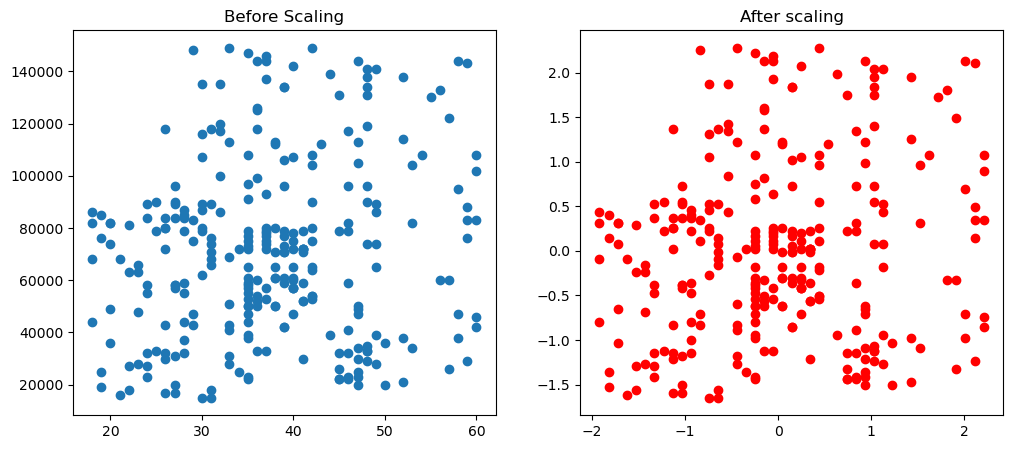

In [47]:
#The Axes. scatter() function in axes module of matplotlib library is used to plot a scatter of y vs. x with varying marker size and/or color.
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x=X_train['Age'],y=X_train['EstimatedSalary'])
ax1.set_title(label='Before Scaling')
ax2.scatter(x=X_train_scaled['Age'],y=X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title(label='After scaling')
plt.show()

/Users/puja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/puja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/puja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/puja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

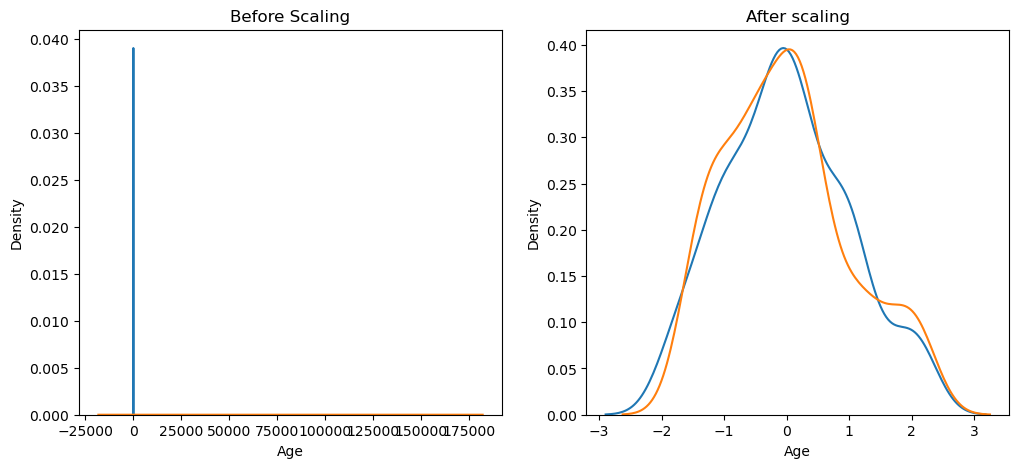

In [49]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax1.set_title(label='Before Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
ax2.set_title(label='After scaling')
plt.show()

/Users/puja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/puja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


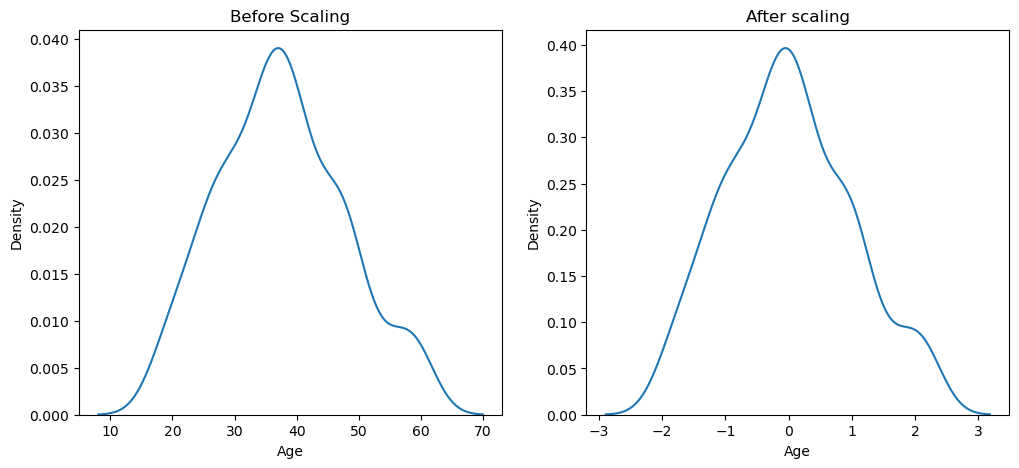

In [50]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(X_train['Age'],ax=ax1)

ax1.set_title(label='Before Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
ax2.set_title(label='After scaling')
plt.show()

/Users/puja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/puja/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


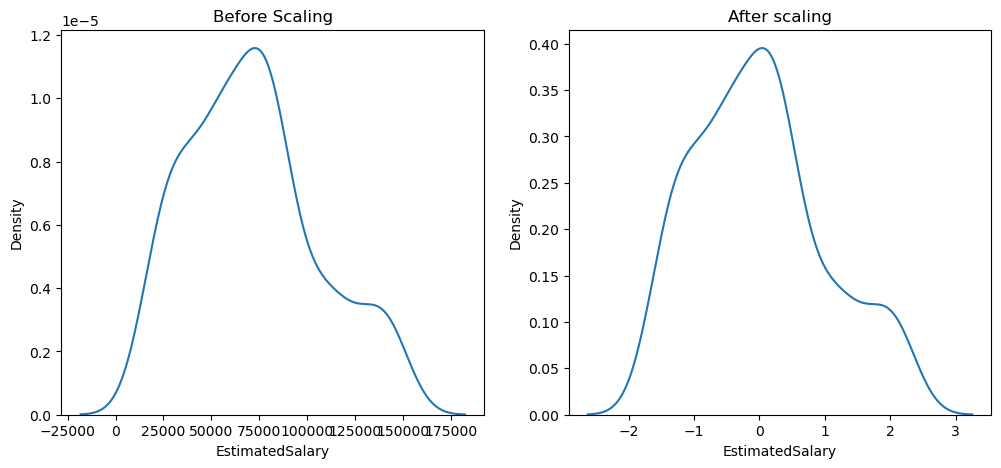

In [51]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax1.set_title(label='Before Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
ax2.set_title(label='After scaling')
plt.show()

**Why Scaling is Important?**

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
#creating two objects for logisticregression
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [59]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

/Users/puja/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/puja/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [65]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.85


In [69]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
#creating two objects for DecisionTreeClassifier
dr=DecisionTreeClassifier()
dr_scaled=DecisionTreeClassifier()

In [73]:
dr.fit(X_train,y_train)
dr_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [74]:
y_pred=dr.predict(X_test)
y_pred_scaled=dr_scaled.predict(X_test_scaled)

In [75]:
print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.8583333333333333
Scaled 0.8583333333333333


**Effect of Outlier**

In [93]:
df=df.insert(1,'Age',[5,90,95])
df

ValueError: cannot insert Age, already exists

In [88]:
df = pd.concat(df,pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"